In [1]:
import fastai
from fastai.collab import *
from fastai.tabular import *

In [2]:
url = URLs.ML_SAMPLE
root = Path("F:\\data\\fastai")
fname = root/"ml_sample.tar.gz"
dest = root/"ml_sample"

In [3]:
path = untar_data(url,fname=fname,dest=dest)

In [4]:
path

WindowsPath('F:/data/fastai/ml_sample')

In [5]:
! ls F:/data/fastai

CamVid
adult_sample
adult_sample.tar.gz
biwi_head_pose
biwi_head_pose.tar.gz
biwi_sample
biwi_sample.tar.gz
coco_sample
coco_sample.tgz
imdb
imdb.tar.gz
imdb_sample
imdb_sample.tar.gz
ml-100k
ml-100k.zip
ml_sample.tar.gz
mnist_sample
mnist_sample.tgz
movie_lens_sample
oxford-iiit-pet
oxford-iiit-pet.tgz


In [6]:
path = root/"movie_lens_sample"

In [7]:
path

WindowsPath('F:/data/fastai/movie_lens_sample')

In [8]:
! ls F:/data/fastai/movie_lens_sample

ratings.csv


In [9]:
pd_data = pd.read_csv(path/"ratings.csv")

In [10]:
pd_data.sample(10)

,userId,movieId,rating,timestamp
2757,547,1265,5.0,974780741
2721,665,539,4.0,993346341
1780,17,4973,4.5,1127470007
1009,664,480,3.5,1343747011
2151,358,587,4.0,957479393
1047,355,58559,5.0,1231028576
3955,30,586,4.0,945278021
147,247,316,4.0,953272304
4544,212,367,1.0,1218403792
4729,461,6377,4.5,1093224378


In [11]:
databunch = CollabDataBunch.from_df(pd_data)

In [12]:
learner = collab_learner(data=databunch,n_factors=50,y_range=(0.,5.))

In [13]:
learner.fit_one_cycle(5,max_lr=5e-3,wd=0.1)

epoch,train_loss,valid_loss
1,2.436805,2.051590
2,1.116882,0.696000
3,0.733804,0.667515
4,0.628209,0.654465
5,0.573767,0.651077


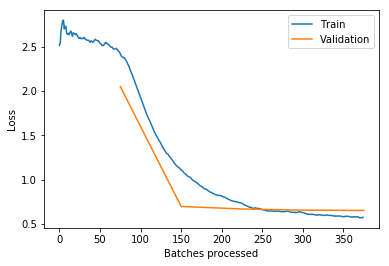

In [14]:
learner.recorder.plot_losses()

In [15]:
path = root/"ml-100k"
path

WindowsPath('F:/data/fastai/ml-100k')

In [16]:
! ls F:/data/fastai/ml-100k

README
allbut.pl
mku.sh
u.data
u.genre
u.info
u.item
u.occupation
u.user
u1.base
u1.test
u2.base
u2.test
u3.base
u3.test
u4.base
u4.test
u5.base
u5.test
ua.base
ua.test
ub.base
ub.test


In [18]:
user,item,title = 'userId','movieId','title'

In [19]:
u_data = pd.read_csv(path/"u.data",delimiter="\t",names=[user,item,'rating','timestamp'],header=None)

In [20]:
u_data.sample(10)

,userId,movieId,rating,timestamp
12467,200,1060,3,876042340
15841,262,709,5,879795122
69068,627,550,1,879531352
44568,660,625,3,891200513
86269,104,328,3,888442249
12432,49,737,1,888066828
93425,655,865,4,887523909
58629,487,71,3,883530786
99153,592,1079,1,882608873
35222,330,31,5,876546812


In [21]:
u_item = pd.read_csv(path/"u.item",delimiter="|",encoding='latin-1', header=None,
                    names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])

In [22]:
u_item.sample(10)

,movieId,title,date,N,url,g0,g1,g2,g3,g4,...,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
464,465,"Jungle Book, The (1994)",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Jungle%20Book...,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
595,596,"Hunchback of Notre Dame, The (1996)",21-Jun-1996,NaN,http://us.imdb.com/M/title-exact?Hunchback%20o...,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
1102,1103,Trust (1990),01-Jan-1990,NaN,http://us.imdb.com/Title?Trust+(1990),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
189,190,Henry V (1989),01-Jan-1989,NaN,http://us.imdb.com/M/title-exact?Henry%20V%20(...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
752,753,Burnt By the Sun (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Utomlyonnye%2...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660,661,High Noon (1952),01-Jan-1952,NaN,http://us.imdb.com/M/title-exact?High%20Noon%2...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
158,159,Basic Instinct (1992),01-Jan-1992,NaN,http://us.imdb.com/M/title-exact?Basic%20Insti...,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
845,846,To Gillian on Her 37th Birthday (1996),18-Oct-1996,NaN,http://us.imdb.com/M/title-exact?To%20Gillian%...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
311,312,Midnight in the Garden of Good and Evil (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Midnight+in+t...,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
921,922,Dead Man (1995),10-May-1996,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
len(u_data)

100000

In [24]:
len(u_item)

1682

In [25]:
data = u_data.merge(u_item[[item,title]])

In [26]:
data.sample(5)

,userId,movieId,rating,timestamp,title
72044,417,792,4,879648079,Bullets Over Broadway (1994)
55980,193,121,3,889125913,Independence Day (ID4) (1996)
22519,643,117,3,891445823,"Rock, The (1996)"
97550,699,989,4,883279196,Cats Don't Dance (1997)
50769,288,50,4,886374520,Star Wars (1977)


In [27]:
data_bunch = CollabDataBunch.from_df(data,seed=42, pct_val=0.1,item_name=title)

In [28]:
data_bunch.show_batch()

userId,title,target
782,"Designated Mourner, The (1997)",2.0
830,City Hall (1996),2.0
906,"Rock, The (1996)",4.0
527,Schindler's List (1993),3.0
255,Fargo (1996),3.0


In [30]:
learner = collab_learner(data=data_bunch,n_factors=40, y_range=[0.,5.5], wd=1e-1)

In [32]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


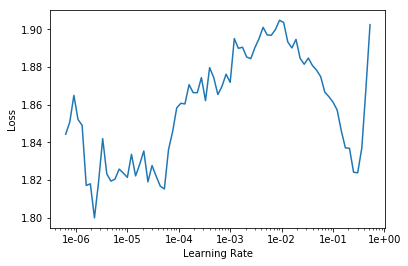

In [35]:
learner.recorder.plot(skip_end=15)

In [36]:
learner.fit_one_cycle(3,max_lr=5e-3)

epoch,train_loss,valid_loss
1,0.919133,0.926187
2,0.819515,0.847048
3,0.731963,0.829351


In [38]:
dotprop = learner.save("dotprop",return_path=True)

In [41]:
learner.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [42]:
g = data.groupby(title)['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

In [45]:
movie_bias = learner.bias(top_movies)
movie_bias.shape

torch.Size([1000])

In [46]:
mean_ratings = data.groupby(title)['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

In [47]:

item0 = lambda o:o[0]

In [49]:
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.3057),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.2749),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2480), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2350), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2310), 'Booty Call (1997)', 2.1666666666666665),
 (tensor(-0.2251), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2213), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2007), 'Beverly Hills Ninja (1997)', 2.3125),
 (tensor(-0.1990), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.1960), 'Home Alone 3 (1997)', 1.894736842105263),
 (tensor(-0.1955), 'Leave It to Beaver (1997)', 1.8409090909090908),
 (tensor(-0.1936), 'Son in Law (1993)', 2.4871794871794872),
 (tensor(-0.1916), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.1906), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.1873),

In [50]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.5515), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5487), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5332), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5318), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.5273), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5233), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.4768), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.4619), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4550), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.4545), 'Apt Pupil (1998)', 4.1),
 (tensor(0.4541), 'Godfather, The (1972)', 4.283292978208232),
 (tensor(0.4445), 'Close Shave, A (1995)', 4.491071428571429),
 (tensor(0.4342), 'Vertigo (1958)', 4.251396648044692),
 (tensor(0.4270), 'North by Northwest (1959)', 4.284916201117318),
 (tensor(0.4268), 'Boot, Das (1981)', 4.203980099502488)]

In [52]:
movie_w = learner.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 40])

In [54]:
movie_pca = movie_w.pca(3)
movie_pca.shape

RuntimeError: gesdd : Lapack library not found in compile time
 at f:\workspace\python\pytorch\aten\src\th\generic\thlapack.cpp:107